[[ 12.  57.  56.]
 [ 12.  57.  57.]
 [ 12.  57.  58.]
 ...
 [118.  67.  62.]
 [118.  67.  63.]
 [118.  67.  64.]]
(44186, 3)


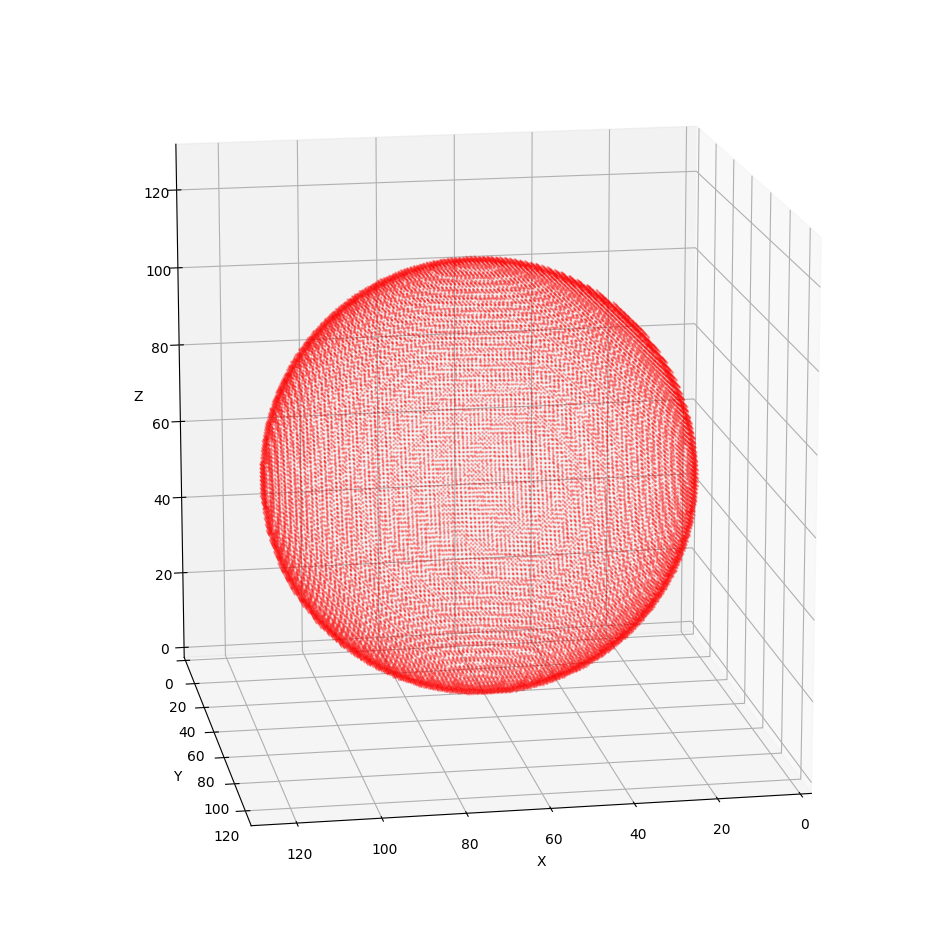

In [5]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



b = np.loadtxt('C:/Users/ku-admin/Desktop/choten/sphere128.txt', delimiter=',')
b = np.delete(b, 0, axis=1)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0)
print(virtex)
print(virtex.shape)

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(virtex[:,0], virtex[:,1], virtex[:,2], s = 0.5, c = "red", alpha = 0.3)
ax.view_init(elev=15, azim=80)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

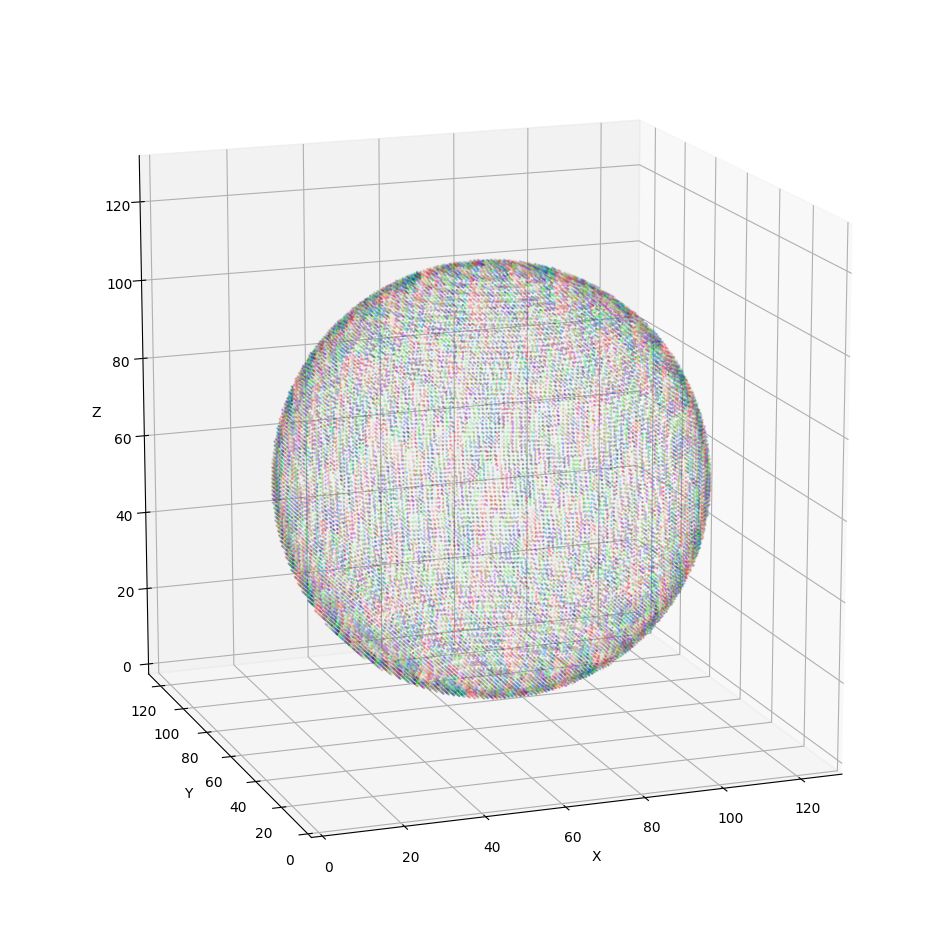

In [28]:
#128の座標に色情報が入った配列
dot = virtex.shape[0]
   

# n行3列のnumpy配列を生成
color = np.zeros((dot, 3), dtype=int)

# RGB値を設定
for i in range(dot):
    #red = 255 * (dot - i) // dot
    #blue = 255 * i // dot
    #green = 0
    red = 3*i % 256
    blue = 10*(i+120) % 256
    green = 7*(i+240) % 256

    #red = 255
    #blue = 0
    #green = 0
    color[i] = [red, green, blue]

virtex_color = np.concatenate([virtex, color], 1)
colors = virtex_color[:, 3:6]
colors_seikika = colors/255

#print(virtex_color)
#print(colors)
# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex_color[:,0], virtex_color[:,1], virtex_color[:,2], s = 0.5, c = colors_seikika, alpha = 0.3)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

In [83]:
gensui0 = 0.5
gensui0_inv = 1/gensui0

#この減衰に意味はある？
#減衰→量子化→逆量子化→減衰の分増える
#意味なくね？　一次元目のDCTの減衰だけ意味ある

seikika = 4
#こっちはちゃんと意味ある
#テーブルを調整して高周波が消えないようにすれば沢山正規化しても大丈夫かもしれない
#高周波の量子化ビットを小さく、低周波の量子化ビットを大きくする

#一次元目が終わった段階で一旦量子化をはさんで2次元目に行くことで、一旦サイズを小さくできるので、二次元目でさらに大きくなるのを防げるかも？
#これあり、8日にやってみる
#この結果までと文献紹介をミーティング資料とする

#量子化
R = 4

#量子化M
M = 4
M00 = 1

#1次元DCTにすれば8ビットでもいけるかも
#２００ぐらいまでに落とせば、ビットの使い方で、何とかなるかも

#直流成分がもしマイナスなら127にするとか？

#上から0.5、4、4でいい感じかも

In [78]:
#量子化テーブルの作成
import numpy as np

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[16,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

ryoshi_Y_8bit = np.array([[16,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableY = ryoshi_Y_8bit//R
tableY = tableY.astype(np.int8)
print(tableY)



tableC = np.zeros((8,8))
ryoshi_C = np.array([[17,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])

ryoshi_C_8bit = np.array([[17,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])

tableC = ryoshi_C_8bit//R
tableC = tableC.astype(np.int8)
print(tableY)

tableM = np.ones((8,8))
tableM = tableM*M
tableM[0,:] = M00*M
tableM = tableM.astype(np.int8)
print(tableM)

#量子化テーブルの値は8ビットまでにする必要がある
#このままだとこえてる　１６ならいける
#二個のテーブルに分けて二回かけるとかにすれば8ビットにおさめられる？
#それか、８びっとで収まるようにして、それで十分に圧縮できればそれでいいかも

[[ 4  2  2  4  6 10 12 15]
 [ 3  3  3  4  6 14 15 13]
 [ 3  3  4  6 10 14 17 14]
 [ 3  4  5  7 12 21 20 15]
 [ 4  5  9 14 17 27 25 19]
 [ 6  8 13 16 20 26 28 23]
 [12 16 19 21 25 30 30 25]
 [18 23 23 24 28 25 25 24]]
[[ 4  2  2  4  6 10 12 15]
 [ 3  3  3  4  6 14 15 13]
 [ 3  3  4  6 10 14 17 14]
 [ 3  4  5  7 12 21 20 15]
 [ 4  5  9 14 17 27 25 19]
 [ 6  8 13 16 20 26 28 23]
 [12 16 19 21 25 30 30 25]
 [18 23 23 24 28 25 25 24]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]


In [85]:
#DCTIDCT

import numpy as np
import matplotlib.pyplot as plt

#コサイン定数の定義
"""
C13 = -0.831469612
C9 = -0.195090322
C5 = 0.555570233
"""
C13 = -1
C9 = -0.25
C5 = 0.5
#シフト演算のみでできるように

#課題：ハードウェアでやる場合の誤差伝搬をどう少なくするか

"""
C5_inv = 1 / C5
C9_inv = 1 / C9
C13_inv = 1 / C13
"""
C5_inv = 1 / C5
C9_inv = 1 / C9
C13_inv = 1 / C13



"""
print(C5_inv)
print(C9_inv)
print(C13_inv)
"""
#8*8*8を生成(8*8の同じ画像を8枚)
#ランダム
"""
x_in1 = np.random.rand(8,8,8)*255
x_in1 = x_in1.astype(np.int64)
"""
#自作

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))


def butterfly_1(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[2] + x[3]
    X[2] = x[0] - x[1]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[6] + x[7]
    X[6] = x[4] - x[5]
    X[7] = x[6] - x[7]
    return X

def butterfly_2(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[4] + x[5]
    X[2] = x[2] + x[3]
    X[3] = x[6] + x[7]
    X[4] = x[0] - x[1]
    X[5] = x[4] - x[5]
    X[6] = x[2] - x[3]
    X[7] = x[6] - x[7]
    return X

def butterfly_3(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    X[2] = x[2] + x[3]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[4] - x[5]
    X[6] = x[6] + x[7]
    X[7] = x[6] - x[7]
    return X

def cosine(x):
    X = np.zeros(8)
    X[0] = x[0]*gensui0
    X[1] = x[1]*C13
    X[2] = x[2]*C9
    X[3] = x[3]*C9*C13
    X[4] = x[4]*C5
    X[5] = x[5]*C13*C5
    X[6] = x[6]*C9*C5
    X[7] = x[7]*C13*C9*C5
    return X

def Ibutterfly_1(X):
    x = np.zeros(8)
    x[0] = 0.5*(X[0] + X[2]) + 0
    x[1] = 0.5*(X[0] - X[2])
    x[2] = 0.5*(X[1] + X[3])
    x[3] = 0.5*(X[1] - X[3])
    x[4] = 0.5*(X[4] + X[6])
    x[5] = 0.5*(X[4] - X[6])
    x[6] = 0.5*(X[5] + X[7])
    x[7] = 0.5*(X[5] - X[7])
     #オーバーフローした直流成分は無理やり正にする
    if x[0] < 0:
        x[0] = 127
    return x

def Ibutterfly_2(X):
    x = np.zeros(8)
    x[0] = (X[0] + X[4]) / 2.0 
    x[1] = (X[0] - X[4]) / 2.0
    x[2] = (X[2] + X[6]) / 2.0
    x[3] = (X[2] - X[6]) / 2.0
    x[4] = (X[1] + X[5]) / 2.0
    x[5] = (X[1] - X[5]) / 2.0
    x[6] = (X[3] + X[7]) / 2.0
    x[7] = (X[3] - X[7]) / 2.0
    return x

def Ibutterfly_3(X):
    x = np.zeros(8)
    x[0] = 0.5 * (X[0] + X[1]) + 0
    x[1] = 0.5 * (X[0] - X[1])
    x[2] = 0.5 * (X[2] + X[3])
    x[3] = 0.5 * (X[2] - X[3])
    x[4] = 0.5 * (X[4] + X[5])
    x[5] = 0.5 * (X[4] - X[5])
    x[6] = 0.5 * (X[6] + X[7])
    x[7] = 0.5 * (X[6] - X[7])
    return x

def inv_cosine(X):
    x = np.zeros(8)
    x[0] = X[0] * gensui0_inv
    x[1] = X[1] * C13_inv
    x[2] = X[2] * C9_inv
    x[3] = X[3] * (C9_inv * C13_inv)
    x[4] = X[4] * C5_inv
    x[5] = X[5] * (C5_inv * C13_inv)
    x[6] = X[6] * (C5_inv * C9_inv)
    x[7] = X[7] * (C5_inv * C9_inv * C13_inv)
    return x

def DCT1(x_in):
    X_1 = butterfly_1(x_in)
    X_2 = butterfly_2(X_1)
    X_3 = butterfly_3(X_2)
    X_out = cosine(X_3)
    return X_out

def IDCT1(X_out):
    X_3 = inv_cosine(X_out).astype(np.int8)
    X_2 = Ibutterfly_3(X_3).astype(np.int8)
    X_1 = Ibutterfly_2(X_2).astype(np.int8)
    x = Ibutterfly_1(X_1).astype(np.int8)
    return x

def DCT(x_in):
    for i in range(8):
        x = x_in[i]
        X_out = DCT1(x)
        x_in[i] = X_out
    return x_in
    
def IDCT(X_out):
    for i in range(8):
        X = X_out[i]
        x = IDCT1(X_out)
        X_out[i] = x
    return X_out

"""
def tenchi(x):
    y = np.zeros((8,8))
    for i in range(8):
        y[i] = np.transpose(x[i])
    return y
"""

def tenchi2D(x):
    x = np.transpose(x)
    return x


def DCT_2D(x_in1, X_out1, x_in2, X_out2):
    # ｘ方向   
    for i in range(8):
        X_out1[i] = DCT1(x_in1[i])
    #転置
    x_in2 = tenchi2D(X_out1)
    #ここで一旦量子化する
    x_in2 = x_in2/tableM
    #ｙ方向
    for i in range(8):
        X_out2[i] = DCT1(x_in2[i])
    return X_out2

"""
def DCT_3D(x_in1, X_out1, x_in2, X_out2, x_in3, X_out3):
    # ｘ方向   
    for i in range(8):
        X_out1[i] = DCT(x_in1[i])
    #転置
    x_in2 = tenchi(X_out1)
    #ｙ方向
    for i in range(8):
        X_out2[i] = DCT(x_in2[i])
    #ｚ方向
    x_in3 = np.copy(X_out2)
    x_in3 = np.rot90(x_in3, 1, axes=(2,0))
    for i in range(8):
        X_out3[i] = DCT(x_in3[i])
    return X_out3
"""
    
def IDCT_2D(X_out2i, x_in2i, X_out1i, x_in1i, n):
    for i in range(8):
        x_in2i[i] = IDCT1(X_out2i[i])
    #転置
    X_out1i = tenchi2D(x_in2i).astype(np.int8)
    #ここでMの復元をする
    X_out1i = X_out1i*tableM.astype(np.int8)
    if n == 1:
        print(X_out1i)
    # ｘ方向   
    for i in range(8):
        x_in1i[i] = IDCT1(X_out1i[i])
    x_in1i = x_in1i.astype(np.int8)
    return x_in1i

"""
def IDCT_3D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i):
    #z方向
    for i in range(8):
        x_in3i[i] = IDCT(X_out3[i])
    x_in3i = np.rot90(x_in3i, -1, axes=(2,0))
    X_out2i = np.copy(x_in3i)
    #y方向
    for i in range(8):
        x_in2i[i] = IDCT(X_out2i[i])
    #転置
    X_out1i = tenchi(x_in2i)
    # ｘ方向   
    for i in range(8):
        x_in1i[i] = IDCT(X_out1i[i])
    x_in1i = x_in1i.astype(np.int64)
    #print(x_in1i)
    return x_in1i
"""

'\ndef IDCT_3D(X_out3, x_in3i, X_out2i, x_in2i, X_out1i, x_in1i):\n    #z方向\n    for i in range(8):\n        x_in3i[i] = IDCT(X_out3[i])\n    x_in3i = np.rot90(x_in3i, -1, axes=(2,0))\n    X_out2i = np.copy(x_in3i)\n    #y方向\n    for i in range(8):\n        x_in2i[i] = IDCT(X_out2i[i])\n    #転置\n    X_out1i = tenchi(x_in2i)\n    # ｘ方向   \n    for i in range(8):\n        x_in1i[i] = IDCT(X_out1i[i])\n    x_in1i = x_in1i.astype(np.int64)\n    #print(x_in1i)\n    return x_in1i\n'

C:\Users\ku-admin\AppData\Local\Temp\ipykernel_14808\410263054.py:132: RuntimeWarning: overflow encountered in byte_scalars
  x[0] = 0.5 * (X[0] + X[1]) + 0
C:\Users\ku-admin\AppData\Local\Temp\ipykernel_14808\410263054.py:133: RuntimeWarning: overflow encountered in byte_scalars
  x[1] = 0.5 * (X[0] - X[1])


[[-124  -22   -2    8   -6  -10    0    0]
 [   0   12   -6   -4   24    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0]
 [   0    8    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]
[[116 -40   0   0   0   0   0   0]
 [  0  10   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[[120  20   0   0   0   0   0   0]
 [  4  10   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[[ 36  20   0   0   4  -4   0   0]
 [  0  12   0   0   4  -4   0   0]
 [ 28 -24   0   0   4  

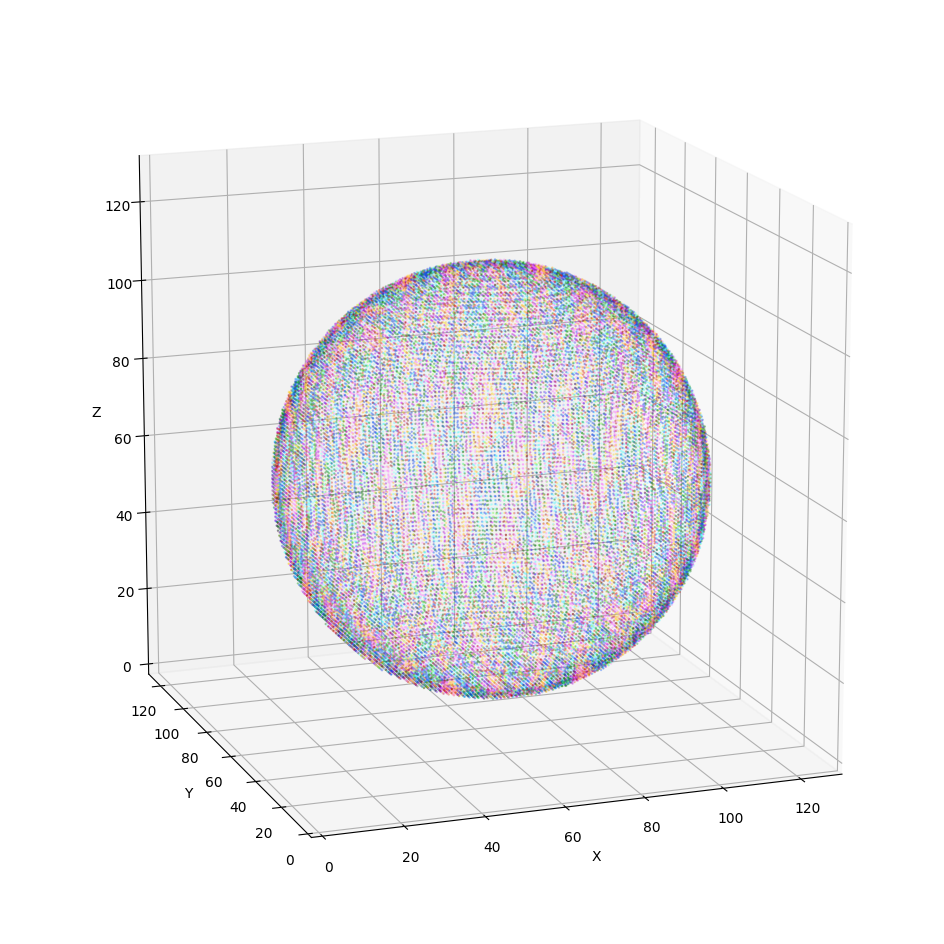

In [86]:
import numpy as np
import cv2

#8*8ずつ
X_out1 = np.zeros((8,8))
X_out2 = np.zeros((8,8))
x_in2 = np.zeros((8,8))
x_in2i = np.zeros((8,8))
x_in1i = np.zeros((8,8))
X_out1i = np.zeros((8,8))
X_out2i = np.zeros((8,8))
nonzeroY = np.array([])
saidaiY = np.array([])
nonzeroCr = np.array([])
saidaiCr = np.array([])
nonzeroCb = np.array([])
saidaiCb = np.array([])

#成分の入れ替え
colors_BGR = colors[:, ::-1]

#実験：小さい範囲に正規化する
#この場合量子化テーブルを小さくする必要がある
#正規化するのはRGBじゃなくてYCrCbのほうがいいかも
colors_BGR = colors_BGR
#print(colors_BGR)

colors_add = np.zeros((64,3))
colors_BGR = np.concatenate([colors_BGR, colors_add], 0).astype(np.uint8)

#枚数を計算
maisu = dot//64 + 1

#発光デバイスを8*8ごとに分割
colors88 = np.zeros((maisu,8,8,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors88[m,i,j] = colors_BGR[k]
            k = k + 1

#データ形式をuint8に変換
colors88 = colors88.astype(np.uint8)
"""cv2.namedWindow("Image1", cv2.WINDOW_NORMAL)
cv2.imshow("Image1", colors88[dot//64,:,:,:])
cv2.waitKey()"""


#色変換，要素ごとに分割
for i in range(maisu):
    colors88[i,:,:,:] = cv2.cvtColor(colors88[i,:,:,:], cv2.COLOR_BGR2YCrCb)
Y = colors88[:,:,:,0].astype(np.float16)
Cr = colors88[:,:,:,1].astype(np.float16)
Cb = colors88[:,:,:,2].astype(np.float16)

#実験：正規化
Y = Y/seikika
Cr = Cr/seikika
Cb = Cb/seikika
#print(Y[0,:,:])

#変換，量子化
for i in range(maisu):
    Y[i,:,:] = DCT_2D(Y[i,:,:], X_out1, x_in2, X_out2)
    Cr[i,:,:] = DCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2)
    Cb[i,:,:] = DCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2)
    #print(Y[0,:,:])
    Y[i,:,:] = Y[i,:,:]/tableY
    Cr[i,:,:] = Cr[i,:,:]/tableC
    Cb[i,:,:] = Cb[i,:,:]/tableC
    Y[i,:,:] = Y[i,:,:].astype(np.int64)
    Cr[i,:,:] = Cr[i,:,:].astype(np.int64)
    Cb[i,:,:] = Cb[i,:,:].astype(np.int64)

    saidaiY = np.append(saidaiY, np.amax(Y[i,:,:]))
    saidaiCr = np.append(saidaiCr, np.amax(Cr[i,:,:]))
    saidaiCb = np.append(saidaiCb, np.amax(Cb[i,:,:]))

    nonzeroY = np.append(nonzeroY, (np.count_nonzero(Y[i,:,:])))
    nonzeroCr = np.append(nonzeroCr, (np.count_nonzero(Cr[i,:,:])))
    nonzeroCb = np.append(nonzeroCb, (np.count_nonzero(Cb[i,:,:])))

    #if i == 0:
        #print(Y[0,:,:])
        #print(saidaiY)
        #print(nonzeroY)

#ここからは整数しか使えない
#嘘、まだ大丈夫
Y = Y.astype(np.int8)
Cr = Cr.astype(np.int8)
Cb = Cb.astype(np.int8)

#復元
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]*tableY.astype(np.int8)
    Cr[i,:,:] = Cr[i,:,:]*tableC.astype(np.int8)
    Cb[i,:,:] = Cb[i,:,:]*tableC.astype(np.int8)

#ここでオーバーフロー検出する
    

#ここから先をマイコンに送る？(どうせ１２７超えたらオーバーフローなので) かつ乗算をなくせる   
#ここから先は整数しか使えない

for i in range(maisu):
    if i == 1:
        print(Y[i,:,:])
        print(Cr[i,:,:])
        print(Cb[i,:,:])
    Y[i,:,:] = IDCT_2D(Y[i,:,:], X_out1, x_in2, X_out2, i)
    Cr[i,:,:] = IDCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2, i)
    Cb[i,:,:] = IDCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2, i)

#uintに変換，YCrCb結合

Y = Y.astype(np.uint8)
Cr = Cr.astype(np.uint8)
Cb = Cb.astype(np.uint8)

#実験：正規化をもとに戻す
Y = Y*seikika
Cr = Cr*seikika
Cb = Cb*seikika

Y[Y<0] = 0
Cr[Cr<0] = 0
Cb[Cb<0] = 0
Y[Y>255] = 255
Cr[Cr>255] = 255
Cb[Cb>255] = 255


Y_recrypt = Y.astype(np.uint8)
Cr_recrypt = Cr.astype(np.uint8)
Cb_recrypt = Cb.astype(np.uint8)
#print(Y_recrypt[0,:,:])
colors88_recrypt = np.stack([Y_recrypt, Cr_recrypt, Cb_recrypt],-1)

#BGRに変換
for i in range(maisu):
    colors88_recrypt[i,:,:,:] = cv2.cvtColor(colors88_recrypt[i,:,:,:], cv2.COLOR_YCrCb2BGR)

#8*8から一列に
colors_BGR_recrypt = np.zeros((dot + 64,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors_BGR_recrypt[k] = colors88_recrypt[m,i,j]
            k = k + 1


#実験：正規化した分を元に戻す

#表示できるように
colors_RGB_recrypt = colors_BGR_recrypt[:, ::-1]
colors_RGB_recrypt = colors_RGB_recrypt[0:dot, :]
colors_RGB_recrypt = colors_RGB_recrypt.astype(np.int16)
virtex = virtex.astype(np.int16)
virtex_colors_recrypt = np.concatenate([virtex, colors_RGB_recrypt], -1)
colors_recrypt = virtex_colors_recrypt[:,3:6]
colors_recrypt_seikika = colors_recrypt/255
#print(virtex_colors_recrypt)

print(np.max(saidaiY))
print(np.max(saidaiCr))
print(np.max(saidaiCb))
print("\n")
print(np.sum(nonzeroY))
print(np.sum(nonzeroCr))
print(np.sum(nonzeroCb))


#像の表示
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex_colors_recrypt[:,0], virtex_colors_recrypt[:,1], virtex_colors_recrypt[:,2], s = 0.5, c = colors_recrypt_seikika, alpha = 0.3)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

#逆の操作をして元の配列に色を戻して表示する
#DCT量子化後の配列の０でない要素の値の数を調べる



